In [1]:
import cv2

## Open Video Camera

In [3]:
# Create Video camera capture object

capture_camera = cv2.VideoCapture(0)

# To make sure video cam keeps on

while True:
    # To initialise and read the camera image
    
    ret,frame = capture_camera.read()
    
    # Show the frame and title of camera screen
    
    cv2.imshow('PyCamera',frame)
    
    # Close the window after certain time and when a key pressed
    
    if cv2.waitKey(1) == ord('q'):
        break
    
capture_camera.release()
cv2.destroyAllWindows()

## Face Capture

In [9]:
# Face capturing through HAAR cascading - Obtain the xml file for frontal face detection from source folder

face_capture = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Create video camera capture   

capture_camera = cv2.VideoCapture(0)

while True:
    # To initialise and read the camera image
    
    ret,frame = capture_camera.read()
    
    # Convert default BGR color scale to Grayscale
    
    color_scale_convert = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    # Detecting faces from the HAAR
    
    face_detector = face_capture.detectMultiScale(
        color_scale_convert,
        scaleFactor=1.1,  # Parameter specifying how much the image size is reduced at each image scale.
        minNeighbors=5,   # Parameter specifying how many neighbors each candidate rectangle should have to retain it.
        minSize=(100,100),  # Minimum possible object size. Objects smaller than that are ignored.
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    
    # Drawing the rectangle around the face (Points on one end and opposite end needed)
    
    for(x,y,height,width) in face_detector:
        cv2.rectangle(frame,(x,y),(x+width,y+height),(255,0,0),3)
    
        # Show the frame and title of camera screen
    
    cv2.imshow('PyCamera',frame)
    
    # Close the window after certain time and when a key pressed
          
    if cv2.waitKey(1) == ord('q'):
        break
    
capture_camera.release()
cv2.destroyAllWindows()
    
    

In [10]:
# Location of HAAR files

print(cv2.data.haarcascades)

C:\Users\Rajarshi Ray\AppData\Local\Programs\Python\Python310\lib\site-packages\cv2\data\


## Deep Face library for emotional analysis

In [4]:
from deepface import DeepFace
import matplotlib.pyplot as plt

In [5]:
# Read the image from opencv

img = cv2.imread('happy.jpg')
img

array([[[134, 140, 139],
        [133, 139, 138],
        [132, 138, 137],
        ...,
        [138, 144, 143],
        [139, 145, 144],
        [139, 145, 144]],

       [[133, 139, 138],
        [133, 139, 138],
        [131, 137, 136],
        ...,
        [137, 143, 142],
        [139, 145, 144],
        [139, 145, 144]],

       [[132, 138, 137],
        [131, 137, 136],
        [130, 136, 135],
        ...,
        [134, 140, 139],
        [137, 143, 142],
        [137, 143, 142]],

       ...,

       [[136, 144, 144],
        [134, 142, 142],
        [131, 139, 139],
        ...,
        [138, 147, 151],
        [140, 149, 153],
        [140, 149, 153]],

       [[136, 144, 144],
        [134, 142, 142],
        [131, 139, 139],
        ...,
        [138, 147, 151],
        [140, 149, 153],
        [140, 149, 153]],

       [[136, 144, 144],
        [134, 142, 142],
        [131, 139, 139],
        ...,
        [138, 147, 151],
        [140, 149, 153],
        [140, 149, 153]]

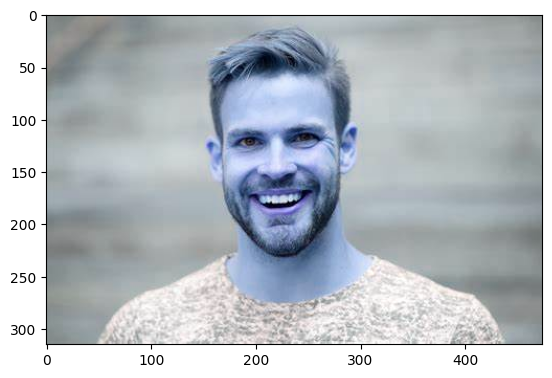

In [7]:
plt.imshow(img)   # BGR format

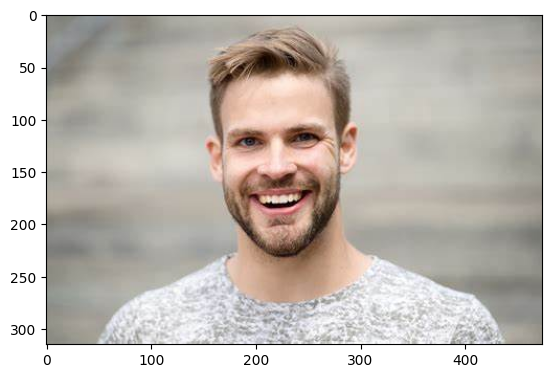

In [8]:
# Convert into RGB Format using cvtColor

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
# Prediction using DeepFace

prediction = DeepFace.analyze(img)
prediction

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\Rajarshi Ray\.deepface\weights\facial_expression_model_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 5.98M/5.98M [00:03<00:00, 1.85MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: C:\Users\Rajarshi Ray\.deepface\weights\age_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 539M/539M [02:32<00:00, 3.54MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: C:\Users\Rajarshi Ray\.deepface\weights\gender_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [02:44<00:00, 3.28MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: C:\Users\Rajarshi Ray\.deepface\weights\race_model_single_batch.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [01:52<00:00, 4.76MB/s]
Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.89it/s]


[{'emotion': {'angry': 1.191422779322506e-13,
   'disgust': 0.0,
   'fear': 5.707126019054682e-26,
   'happy': 100.0,
   'sad': 1.0937575383551054e-20,
   'surprise': 1.1742669210692582e-14,
   'neutral': 3.833995787516642e-07},
  'dominant_emotion': 'happy',
  'region': {'x': 147, 'y': 65, 'w': 147, 'h': 147},
  'age': 25,
  'gender': {'Woman': 2.9634591669491783e-05, 'Man': 99.99997615814209},
  'dominant_gender': 'Man',
  'race': {'asian': 8.274793610735243e-13,
   'indian': 6.875378630137596e-11,
   'black': 1.261976176905816e-13,
   'white': 99.99938011169434,
   'middle eastern': 0.0005388840691011865,
   'latino hispanic': 8.564801987631654e-05},
  'dominant_race': 'white'}]

In [19]:
print(f"The Actual emotion detected : {prediction[0]['dominant_emotion']}")

The Actual emotion detected : happy


In [20]:
# Location of HAAR files

print(cv2.data.haarcascades)

C:\Users\Rajarshi Ray\AppData\Local\Programs\Python\Python310\lib\site-packages\cv2\data\


In [25]:
# Creating a face detection box - combining HAAR Cascades

face_detector_deepface = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert image from BGR - RGB

image_converted = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Initialise the haar cascade for faces

faces = face_detector_deepface.detectMultiScale(
        image_converted,
        scaleFactor=1.1,  # Parameter specifying how much the image size is reduced at each image scale.
        minNeighbors=5,   # Parameter specifying how many neighbors each candidate rectangle should have to retain it.
        minSize=(100,100),  # Minimum possible object size. Objects smaller than that are ignored.
        flags = cv2.CASCADE_SCALE_IMAGE
    )


for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)


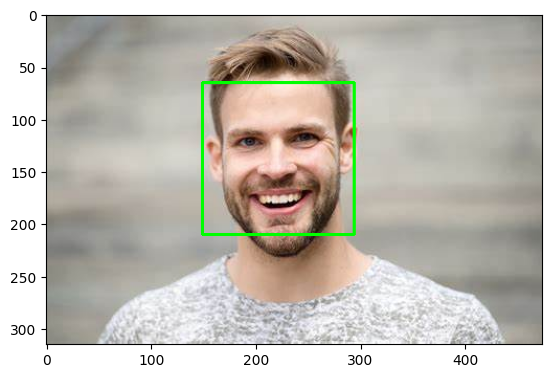

In [28]:
# See the final image
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [31]:
# Putting the text in image

font_style = cv2.FONT_HERSHEY_COMPLEX

cv2.putText(
    img,
    prediction[0]['dominant_emotion'],
    (0,50),
    font_style,
    0.7,
    (0,0,255),
    1
)

array([[[134, 140, 139],
        [133, 139, 138],
        [132, 138, 137],
        ...,
        [138, 144, 143],
        [139, 145, 144],
        [139, 145, 144]],

       [[133, 139, 138],
        [133, 139, 138],
        [131, 137, 136],
        ...,
        [137, 143, 142],
        [139, 145, 144],
        [139, 145, 144]],

       [[132, 138, 137],
        [131, 137, 136],
        [130, 136, 135],
        ...,
        [134, 140, 139],
        [137, 143, 142],
        [137, 143, 142]],

       ...,

       [[136, 144, 144],
        [134, 142, 142],
        [131, 139, 139],
        ...,
        [138, 147, 151],
        [140, 149, 153],
        [140, 149, 153]],

       [[136, 144, 144],
        [134, 142, 142],
        [131, 139, 139],
        ...,
        [138, 147, 151],
        [140, 149, 153],
        [140, 149, 153]],

       [[136, 144, 144],
        [134, 142, 142],
        [131, 139, 139],
        ...,
        [138, 147, 151],
        [140, 149, 153],
        [140, 149, 153]]

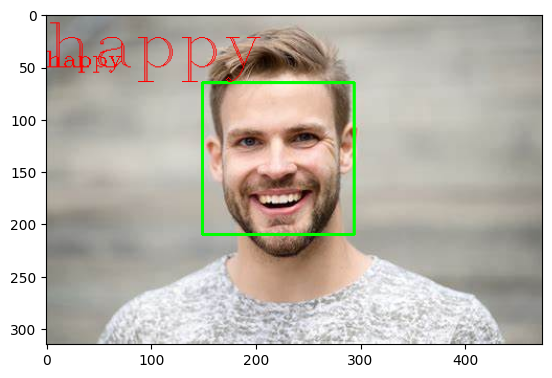

In [33]:
# See the final image
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [34]:
# Testing a new image

img_2 = cv2.imread('sad.jpg')
img_2

array([[[154, 154, 154],
        [154, 154, 154],
        [154, 154, 154],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [148, 148, 148]],

       [[154, 154, 154],
        [154, 154, 154],
        [154, 154, 154],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [148, 148, 148]],

       [[154, 154, 154],
        [154, 154, 154],
        [154, 154, 154],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [148, 148, 148]],

       ...,

       [[168, 168, 168],
        [168, 168, 168],
        [168, 168, 168],
        ...,
        [158, 158, 158],
        [158, 158, 158],
        [158, 158, 158]],

       [[168, 168, 168],
        [168, 168, 168],
        [168, 168, 168],
        ...,
        [158, 158, 158],
        [158, 158, 158],
        [158, 158, 158]],

       [[168, 168, 168],
        [168, 168, 168],
        [168, 168, 168],
        ...,
        [158, 158, 158],
        [158, 158, 158],
        [158, 158, 158]]

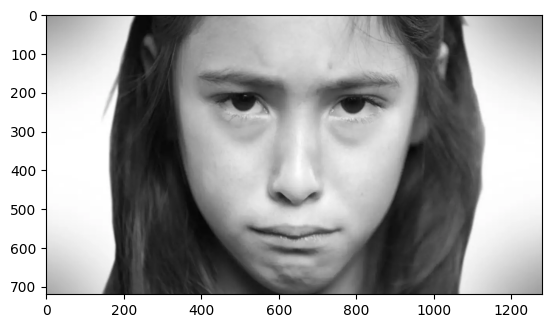

In [35]:
plt.imshow(cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB))

In [38]:
predictor_2 = DeepFace.analyze(img_2,actions=['emotion'])

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.70it/s]


In [39]:
predictor_2

[{'emotion': {'angry': 0.026597216492518783,
   'disgust': 1.383426795342757e-06,
   'fear': 64.45078253746033,
   'happy': 0.0020386913092806935,
   'sad': 23.390376567840576,
   'surprise': 0.00026243537831760477,
   'neutral': 12.129940837621689},
  'dominant_emotion': 'fear',
  'region': {'x': 313, 'y': 29, 'w': 646, 'h': 646}}]

## Live Facial capture prediction webcam system

In [11]:
# Obtain the HAAR Cascade
from deepface import DeepFace
import cv2

facial_live_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Create video capture object

capture = cv2.VideoCapture(0)

# Check if videocam is open on 0 or 1 channel

if not capture.isOpened():
    capture = cv2.VideoCapture(1)

if not capture.isOpened():
    raise IOError("WEBCAM NOT DETECTED")


while True:

    # Read frames

    ret,frame = capture.read()

    # Predict with DeepFace

    prediction_live = DeepFace.analyze(frame,actions=['emotion'],enforce_detection=False)

    # Convert to grayscale

    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    # Initialise the haar cascade for faces

    faces = facial_live_cascade.detectMultiScale(
            gray,
            scaleFactor=1.1,  # Parameter specifying how much the image size is reduced at each image scale.
            minNeighbors=5,   # Parameter specifying how many neighbors each candidate rectangle should have to retain it.
            minSize=(100,100),  # Minimum possible object size. Objects smaller than that are ignored.
            flags = cv2.CASCADE_SCALE_IMAGE
        )

    # Draw rectangle around face

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    # Put text

    font_live = cv2.FONT_HERSHEY_COMPLEX

    cv2.putText(
        frame,
        prediction_live[0]['dominant_emotion'],
        (0,50),
        font_live,
        0.7,
        (0,0,255),
        1
    )


    # Show live feed 

    cv2.imshow('Feed',frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.68it/s]
